# Análise Exploratória dos Dados (EDA) 

In [1]:
# importamos as libs
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
PATH="https://raw.githubusercontent.com/LeiteJu/TCC/main/dados/input/"

ESTADOS=['ACRE', 'ALAGOAS', 'AMAZONAS', 'AMAPÁ', 'BAHIA', ' CEARÁ',
         'DISTRITO FEDERAL', 'ESPÍRITO SANTO', 'GOIÁS', 'MARANHÃO', 'MINAS GERAIS', 'MATO GROSSO DO SUL', 
         'MATO GROSSO', 'PARÁ', 'PARAÍBA', 'PERNAMBUCO', 'PIAUÍ', 'PARANÁ',
         'RIO DE JANEIRO', 'RIO GRANDE DO NORTE', 'RONDÔNIA',  'RORAIMA', 'RIO GRANDE DO SUL', 'SANTA CATARINA', 
         'SERGIPE', 'SÃO PAULO', 'TOCANTINS', 'CEARÁ']

SIGLAS = ["AC","AL","AM","AP","BA","CE",
          "DF","ES","GO","MA","MG","MS",
          "MT","PA","PB","PE","PI","PR",
          "RJ","RN","RO","RR","RS","SC",
          "SE","SP","TO", 'CE']

MAP = dict(zip(ESTADOS, SIGLAS))

# Dados de entrada

In [4]:
df = pd.read_csv(f"{PATH}input-new.csv")

In [5]:
df.head()

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_l,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg
0,AC,1991-01-01,313086.944546,6.734017,0.726939,213061.839872,417102.0,17.03,20.75,19.93,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
1,AC,1991-02-01,313086.944546,6.734017,0.726939,213061.839872,417102.0,15.50,45.77,21.11,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
2,AC,1991-03-01,313086.944546,6.734017,0.726939,213061.839872,417102.0,8.33,63.15,7.25,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
3,AC,1991-04-01,313086.944546,6.734017,0.726939,213061.839872,417102.0,6.77,71.29,8.74,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN
4,AC,1991-05-01,313086.944546,6.734017,0.726939,213061.839872,417102.0,13.19,84.02,6.53,...,0.645,0.574,0.176,11.17,4.782147e+06,NaN,NaN,NaN,NaN,NaN


In [7]:
# vamos analisar apenas os dados que serão de fato utilizados
df=df[df['data'] >= "2003-01-01"]
df.head()

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_l,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg
144,AC,2003-01-01,430485.094667,258531.875894,0.716764,322852.886006,600595.0,1.51,2.25,2.17,...,0.694,0.612,0.325,3.59,6.172460e+06,7.447467,NaN,NaN,NaN,NaN
145,AC,2003-02-01,430485.094667,258531.875894,0.716764,322852.886006,600595.0,1.39,3.86,1.59,...,0.694,0.612,0.325,3.84,6.172460e+06,7.447467,NaN,NaN,NaN,NaN
146,AC,2003-03-01,430485.094667,258531.875894,0.716764,322852.886006,600595.0,1.38,5.13,1.66,...,0.694,0.612,0.325,3.95,6.172460e+06,7.447467,34655.0,NaN,NaN,NaN
147,AC,2003-04-01,430485.094667,258531.875894,0.716764,322852.886006,600595.0,0.90,6.15,0.41,...,0.694,0.612,0.325,4.06,6.172460e+06,7.447467,172597.0,NaN,NaN,NaN
148,AC,2003-05-01,430485.094667,258531.875894,0.716764,322852.886006,600595.0,2.84,6.80,-0.67,...,0.694,0.612,0.325,3.94,6.172460e+06,7.447467,28018.0,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5508 entries, 144 to 9395
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estados     5508 non-null   object 
 1   data        5508 non-null   object 
 2   pib_pc      5508 non-null   float64
 3   pib_pmc     5508 non-null   float64
 4   pib_pcpt    5508 non-null   float64
 5   pib_cc      5508 non-null   float64
 6   populacao   5508 non-null   float64
 7   incc        5508 non-null   float64
 8   ipca        5508 non-null   float64
 9   igp         5508 non-null   float64
 10  selic       5508 non-null   float64
 11  idh_l       5508 non-null   float64
 12  idh_r       5508 non-null   float64
 13  idh_e       5508 non-null   float64
 14  nfsp        5508 non-null   float64
 15  estoque     5508 non-null   float64
 16  desemprego  5304 non-null   float64
 17  producao    3887 non-null   float64
 18  preco_ton   4235 non-null   float64
 19  preco_saco  4235 non-null

In [10]:
pd.options.display.float_format = '{:.2f}'.format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pib_pc,5508.00,9924824.33,16721689.11,333924.72,1955439.80,4370229.24,10126834.13,95460313.88
pib_pmc,5508.00,11633953.08,21319940.85,200541.63,2012080.98,4639622.97,11804086.51,164609207.02
pib_pcpt,5508.00,1.18,0.64,0.36,0.75,1.01,1.45,3.89
pib_cc,5508.00,6180518.95,9665403.38,180024.16,1459543.71,2933389.87,6851317.83,63516179.29
populacao,5508.00,7216120.15,8483943.66,357302.00,2455903.00,3742606.00,8904459.00,45919049.00
incc,5508.00,0.58,0.52,-0.25,0.23,0.41,0.75,2.94
ipca,5508.00,3.36,2.06,0.29,1.77,3.09,4.50,10.67
igp,5508.00,0.50,0.63,-1.24,0.10,0.46,0.92,2.17
selic,5508.00,0.05,0.02,0.02,0.03,0.04,0.05,0.09
idh_l,5508.00,0.78,0.06,0.65,0.74,0.78,0.82,0.89


In [11]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
producao,29.429920
preco_kg,23.111837
preco_saco,23.111837
preco_ton,23.111837
desemprego,3.703704
idh_l,0.000000
estoque,0.000000
nfsp,0.000000
idh_e,0.000000
idh_r,0.000000


In [13]:
df[df["preco_kg"].notna()]

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_l,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg
492,AL,2003-01-01,1596924.09,959047.79,0.55,667727.71,2917664.00,1.51,2.25,2.17,...,0.65,0.57,0.28,3.59,6172460.01,8.18,NaN,95.97,16.50,0.33
493,AL,2003-02-01,1596924.09,959047.79,0.55,667727.71,2917664.00,1.39,3.86,1.59,...,0.65,0.57,0.28,3.84,6172460.01,8.18,NaN,94.69,17.00,0.34
494,AL,2003-03-01,1596924.09,959047.79,0.55,667727.71,2917664.00,1.38,5.13,1.66,...,0.65,0.57,0.28,3.95,6172460.01,8.18,43412.00,98.64,17.00,0.34
495,AL,2003-04-01,1596924.09,959047.79,0.55,667727.71,2917664.00,0.90,6.15,0.41,...,0.65,0.57,0.28,4.06,6172460.01,8.18,151995.00,109.02,17.00,0.34
496,AL,2003-05-01,1596924.09,959047.79,0.55,667727.71,2917664.00,2.84,6.80,-0.67,...,0.65,0.57,0.28,3.94,6172460.01,8.18,14332.00,115.03,17.00,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9043,SP,2019-08-01,93664234.26,164609207.02,2.04,37987605.33,45919049.00,0.42,2.54,-0.51,...,0.85,0.80,0.83,0.62,7827728.37,11.90,NaN,102.69,20.64,0.41
9044,SP,2019-09-01,93664234.26,164609207.02,2.04,37987605.33,45919049.00,0.46,2.49,0.50,...,0.85,0.80,0.83,0.59,7827728.37,11.90,113650.00,100.59,20.73,0.41
9045,SP,2019-10-01,93664234.26,164609207.02,2.04,37987605.33,45919049.00,0.18,2.60,0.55,...,0.85,0.80,0.83,0.57,7827728.37,11.80,NaN,101.43,20.72,0.41
9046,SP,2019-11-01,93664234.26,164609207.02,2.04,37987605.33,45919049.00,0.04,3.12,0.85,...,0.85,0.80,0.83,0.54,7827728.37,11.30,142172.00,99.82,20.74,0.41


In [14]:
df = df[df["data"] >= "1991-01-01"].reset_index(drop=True)

In [15]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
producao,29.429920
preco_kg,23.111837
preco_saco,23.111837
preco_ton,23.111837
desemprego,3.703704
idh_l,0.000000
estoque,0.000000
nfsp,0.000000
idh_e,0.000000
idh_r,0.000000


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estados     9396 non-null   object 
 1   data        9396 non-null   object 
 2   pib_pc      9396 non-null   float64
 3   pib_pmc     9396 non-null   float64
 4   pib_pcpt    9396 non-null   float64
 5   pib_cc      9396 non-null   float64
 6   populacao   9396 non-null   float64
 7   incc        9396 non-null   float64
 8   ipca        9396 non-null   float64
 9   igp         9396 non-null   float64
 10  selic       9396 non-null   float64
 11  idh_l       9396 non-null   float64
 12  idh_r       9396 non-null   float64
 13  idh_e       9396 non-null   float64
 14  nfsp        9396 non-null   float64
 15  estoque     9396 non-null   float64
 16  desemprego  8736 non-null   float64
 17  producao    5508 non-null   float64
 18  preco_ton   4966 non-null   float64
 19  preco_saco  6267 non-null  

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pib_pc,9396.0,8.884727e+06,1.546512e+07,2.223599e+05,1.639188e+06,3.885204e+06,8.752338e+06,9.546031e+07
pib_pmc,9396.0,7.740387e+06,1.729196e+07,4.712304e+00,6.250891e+05,2.440144e+06,7.458359e+06,1.646092e+08
pib_pcpt,9396.0,1.110849e+00,6.659869e-01,3.445102e-01,6.778617e-01,9.293817e-01,1.353092e+00,3.999760e+00
pib_cc,9396.0,6.355513e+06,1.012706e+07,2.293989e+03,1.293523e+06,2.843779e+06,6.931119e+06,6.351618e+07
populacao,9396.0,6.677788e+06,7.956398e+06,2.175830e+05,2.169688e+06,3.474998e+06,8.513497e+06,4.591905e+07
incc,9396.0,3.894282e+00,9.559014e+00,-5.000000e-01,2.975000e-01,5.750000e-01,1.122500e+00,5.571000e+01
ipca,9396.0,6.740652e+01,2.416155e+02,2.900000e-01,2.045000e+00,3.750000e+00,6.580000e+00,2.477150e+03
igp,9396.0,3.878477e+00,9.252582e+00,-1.240000e+00,2.300000e-01,6.800000e-01,1.462500e+00,4.658000e+01
selic,9396.0,2.006583e-01,4.000198e-01,1.781129e-02,4.164407e-02,5.940236e-02,8.976048e-02,2.029579e+00
idh_l,9396.0,7.304342e-01,8.184223e-02,5.510000e-01,6.760000e-01,7.400000e-01,8.000000e-01,8.900000e-01


In [113]:
corr_matrix = df.corr(method="pearson").abs()

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

C:\Users\julia\AppData\Local\Temp\ipykernel_18356\846124379.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


preco_saco  preco_kg      1.000000
igp         selic         0.979787
incc        igp           0.973572
            selic         0.972561
pib_pc      pib_cc        0.952784
            populacao     0.950439
pib_cc      populacao     0.932531
igp         nfsp          0.924957
idh_l       idh_e         0.923898
selic       nfsp          0.913663
incc        nfsp          0.897863
idh_l       idh_r         0.873916
idh_e       estoque       0.855610
pib_pc      pib_pmc       0.848182
estoque     preco_saco    0.846456
            preco_kg      0.846456
pib_pcpt    idh_r         0.795270
pib_pmc     populacao     0.792921
idh_r       idh_e         0.786137
idh_l       estoque       0.771353
pib_pmc     pib_cc        0.730437
dtype: float64

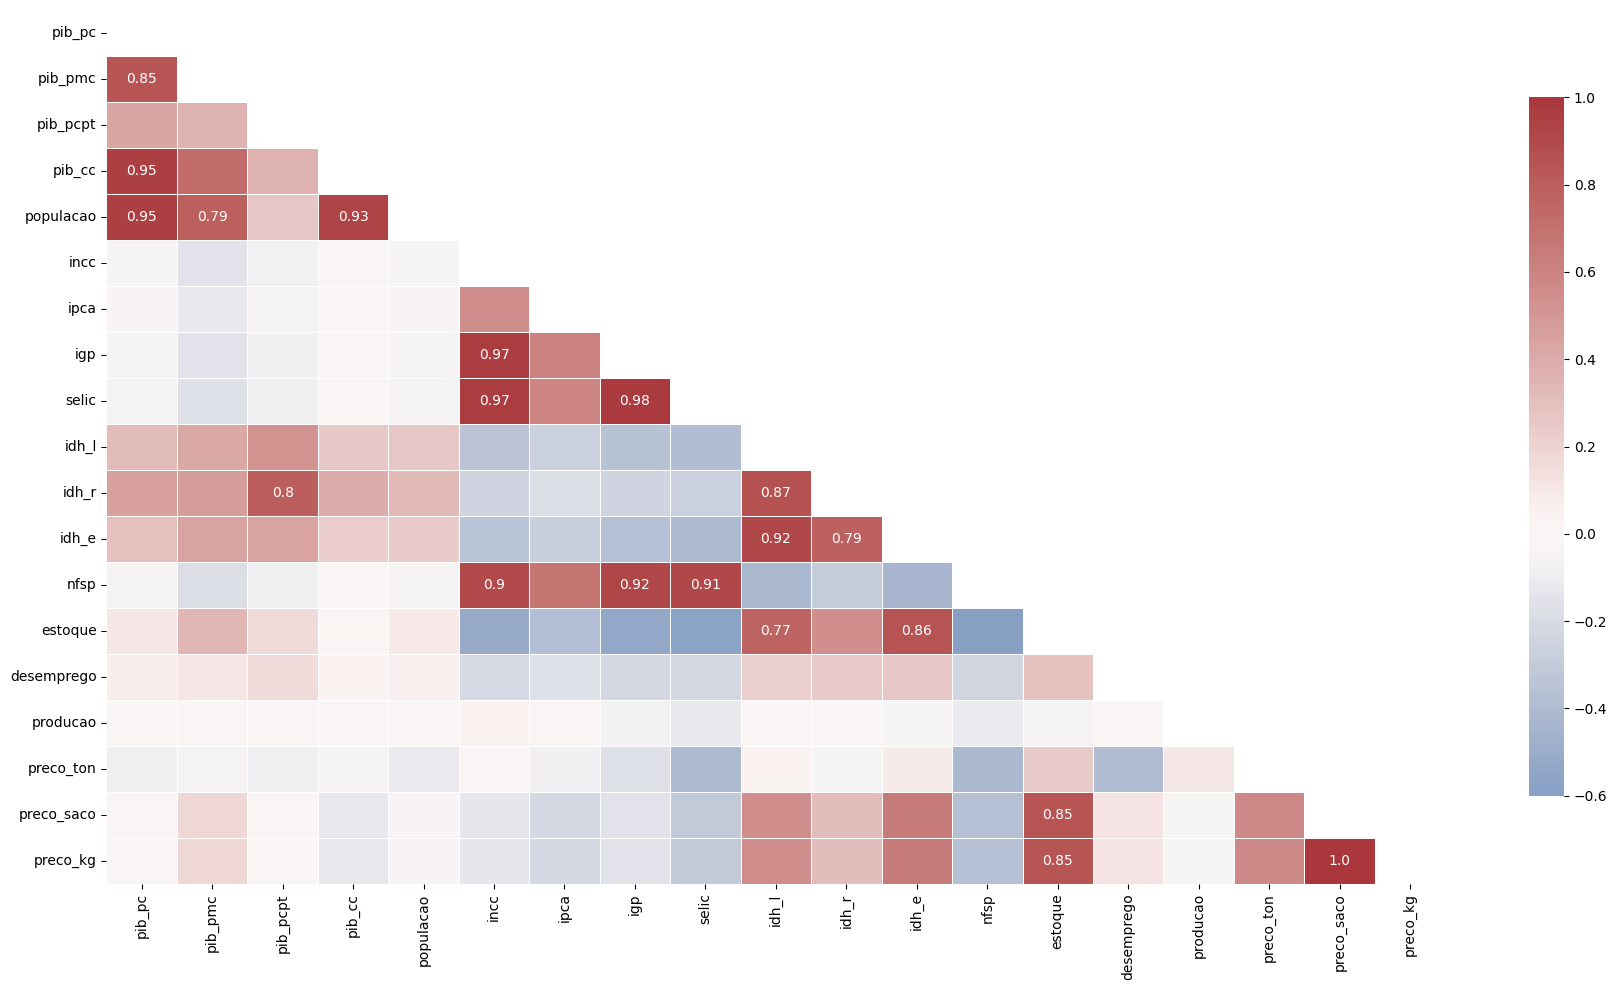

In [114]:
df_corr = df.corr(method="pearson")

labels = np.where(
    np.abs(df_corr) >= 0.75, np.round(df_corr[np.abs(df_corr) > 0.75], 2), ""
)

# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(18, 10))

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

# Consumo

In [4]:
df = pd.read_csv(f"{PATH}processado.csv")

KeyboardInterrupt: 

In [94]:
df.head()

,estados,data,consumo
0,RO,1990-01-01,9903.0
1,AC,1990-01-01,1450.0
2,AM,1990-01-01,21819.0
3,RR,1990-01-01,2040.0
4,PA,1990-01-01,45604.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   estados  9072 non-null   object 
 1   data     9072 non-null   object 
 2   consumo  9072 non-null   float64
dtypes: float64(1), object(2)
memory usage: 212.8+ KB


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consumo,9072.0,134429.42049,195739.563665,0.0,28027.25,66136.0,161813.75,1491696.0


In [97]:
(df.isna().sum()/df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
estados,0.000000
data,0.000000
consumo,0.000000


In [102]:
df=df.set_index('data')

C:\Users\julia\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


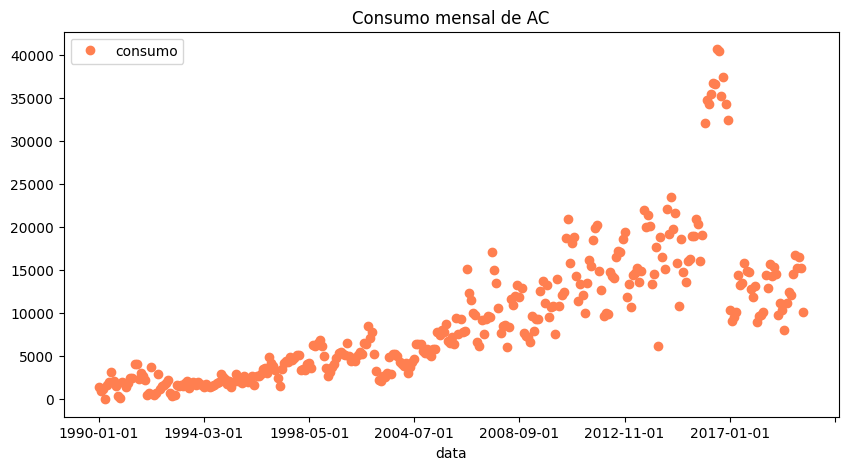

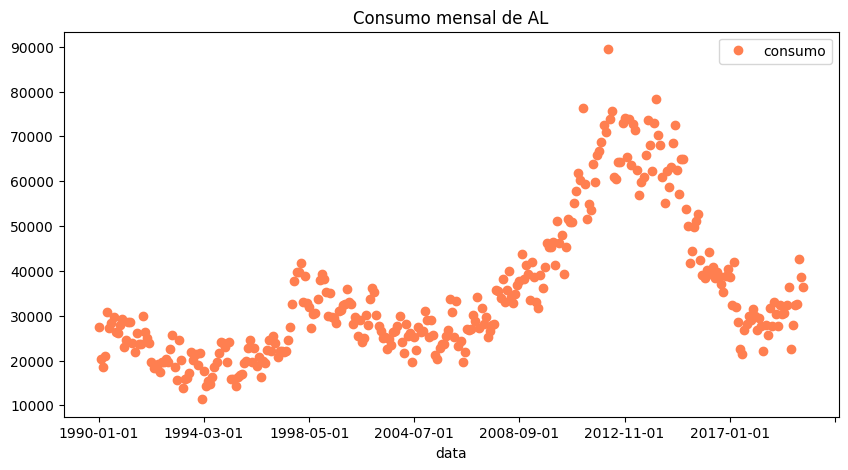

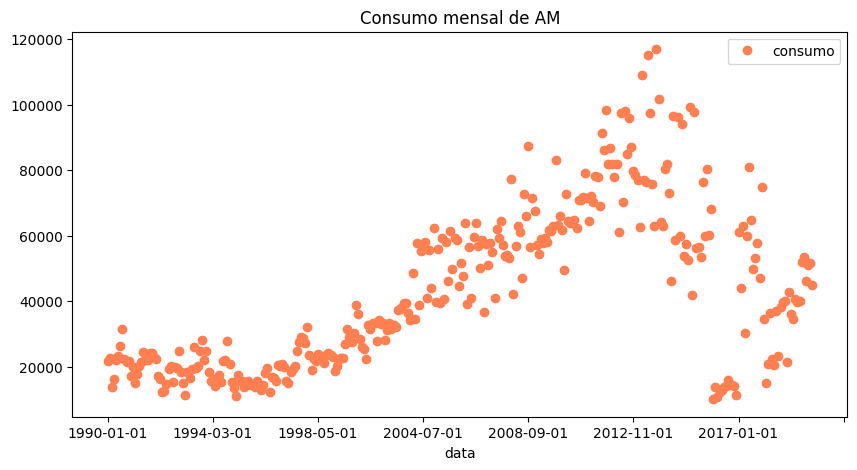

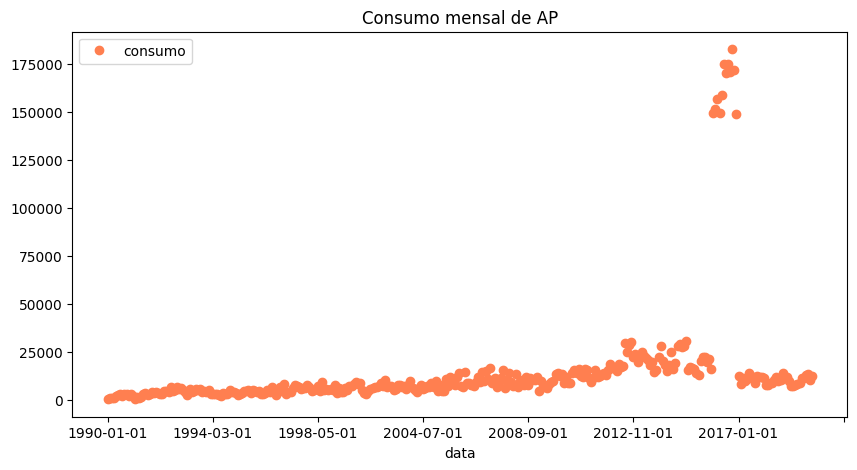

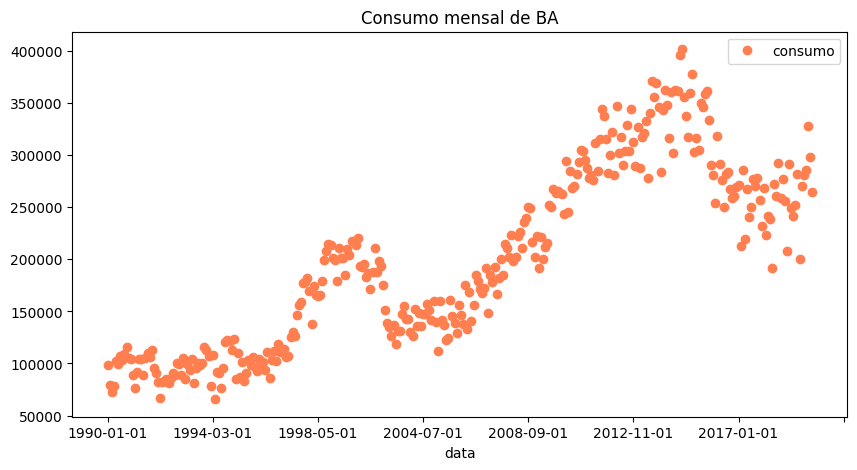

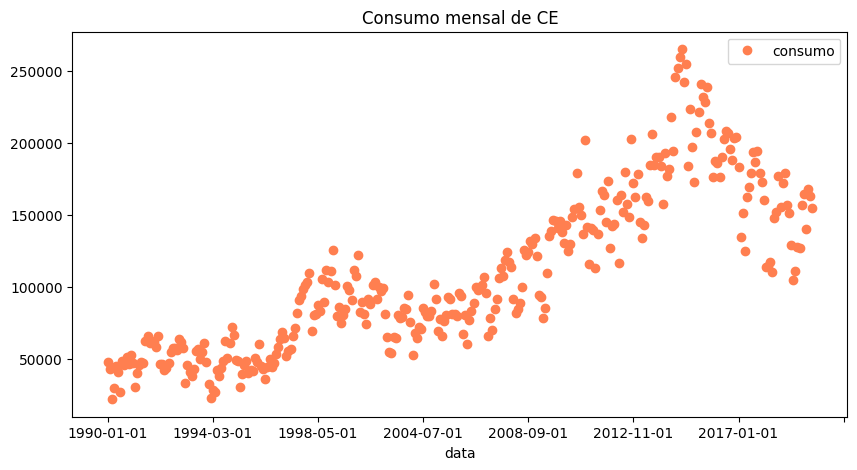

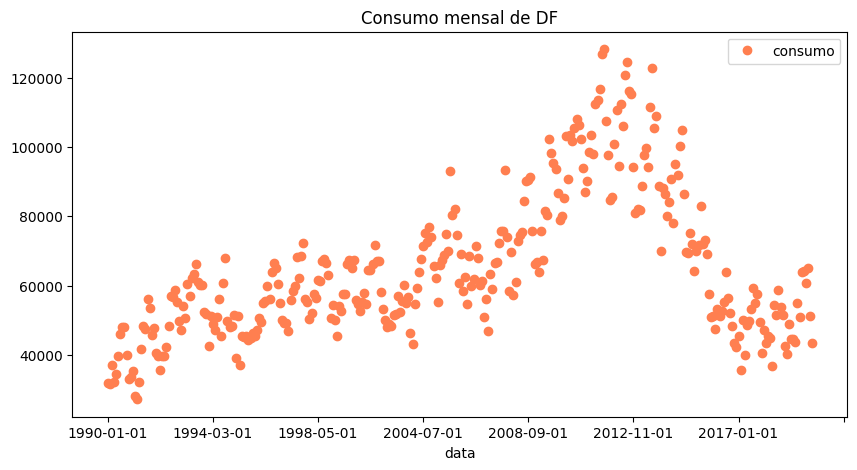

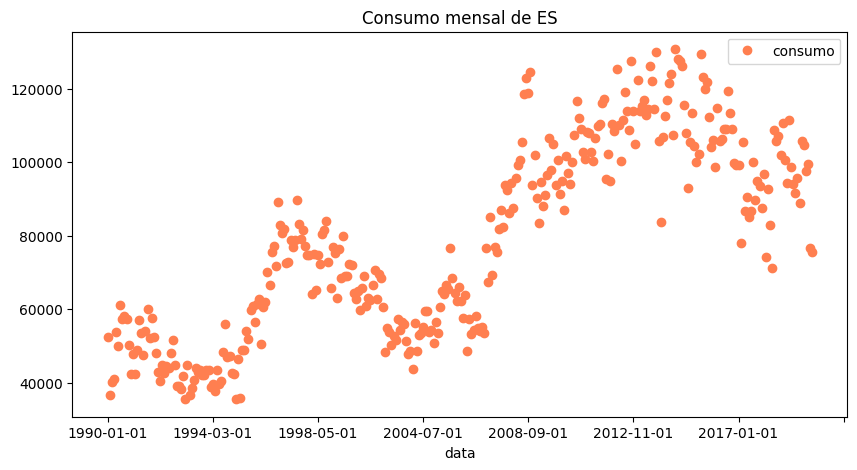

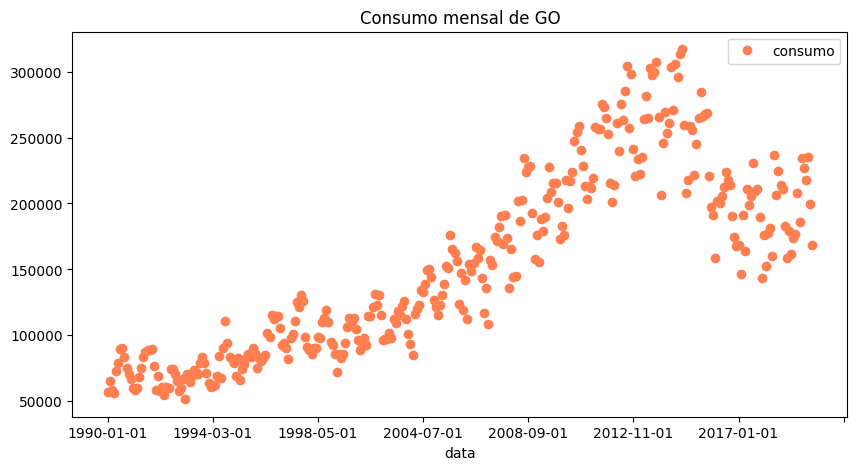

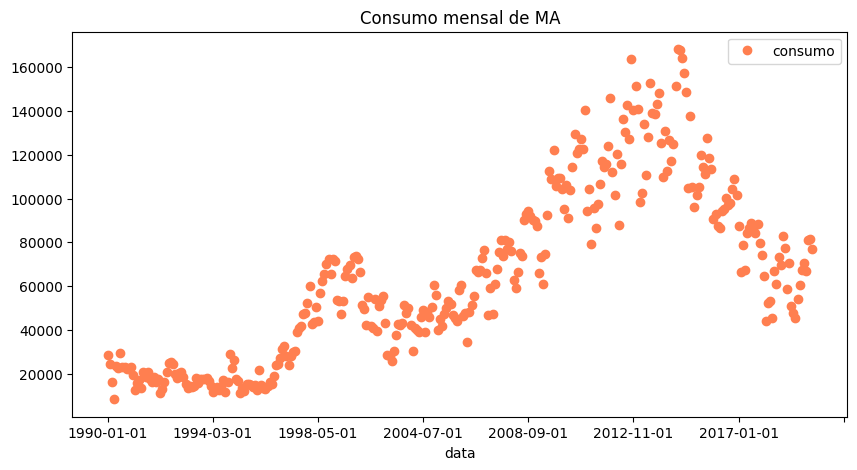

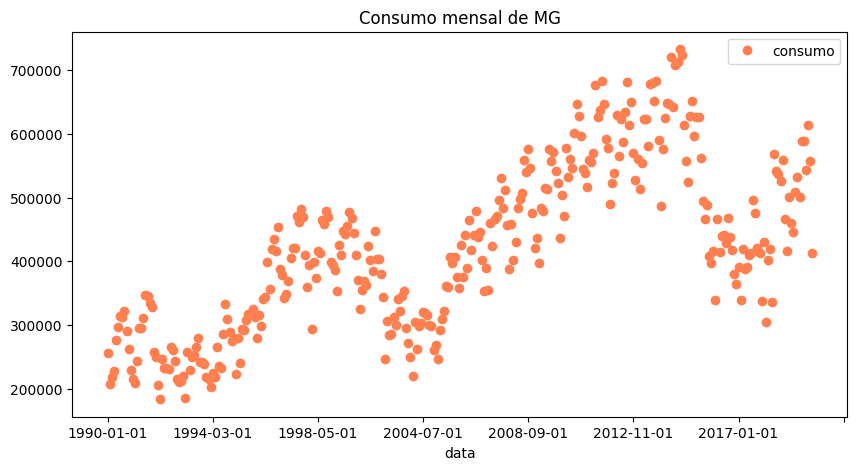

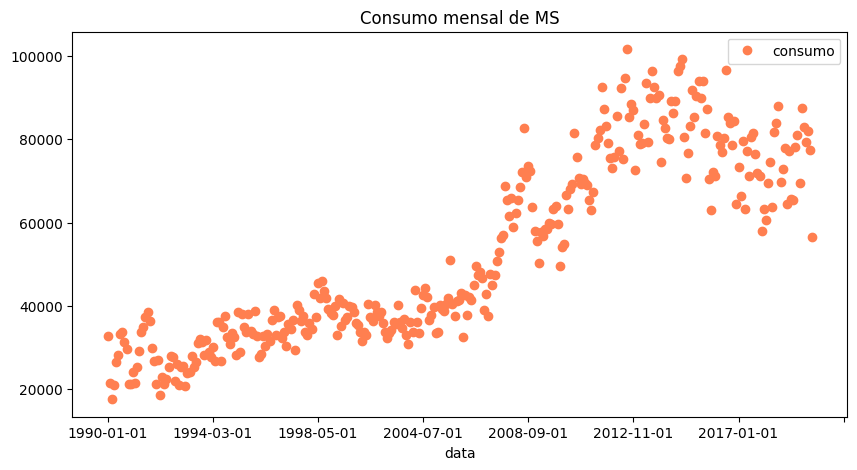

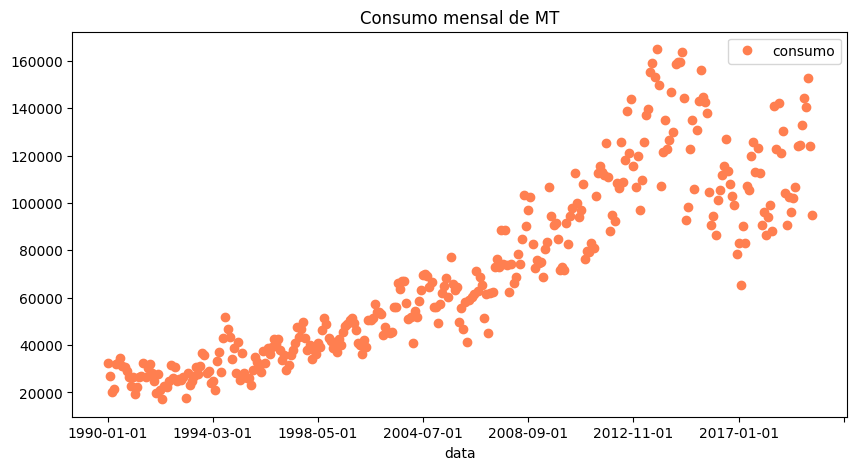

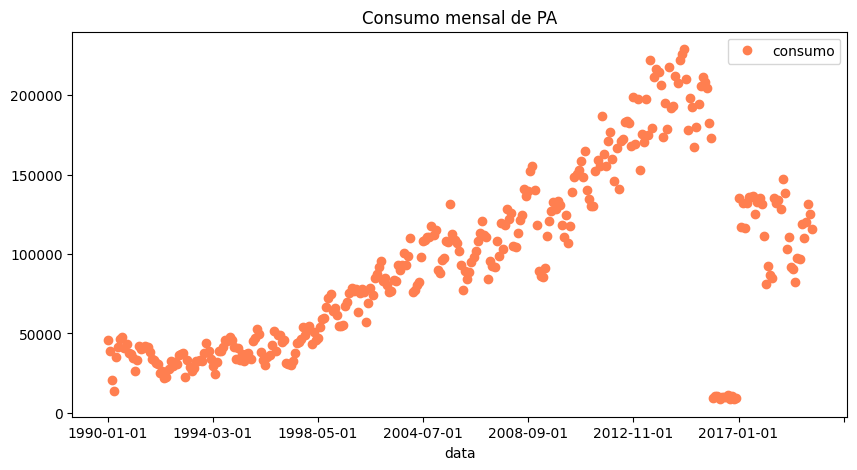

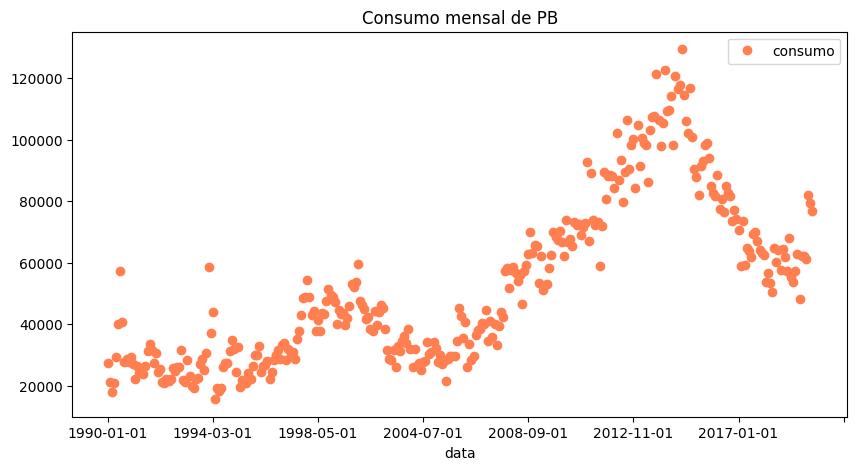

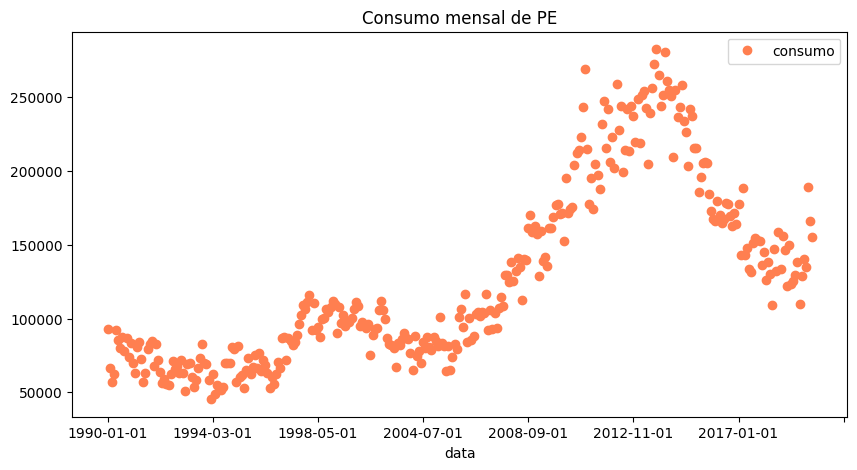

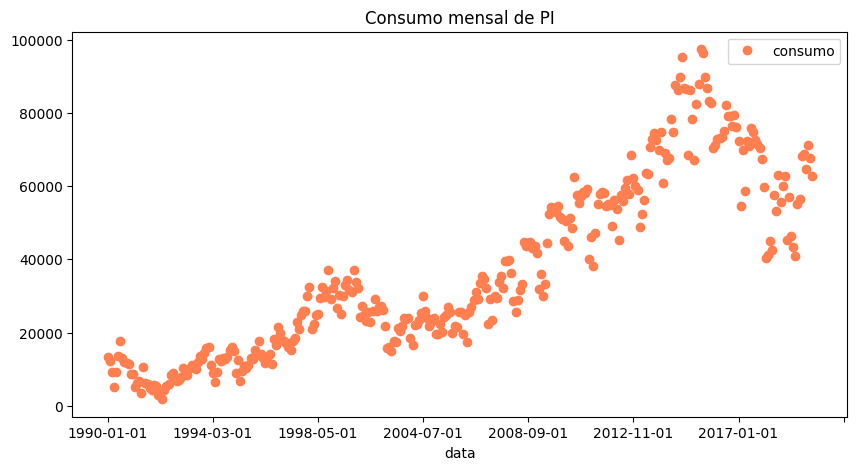

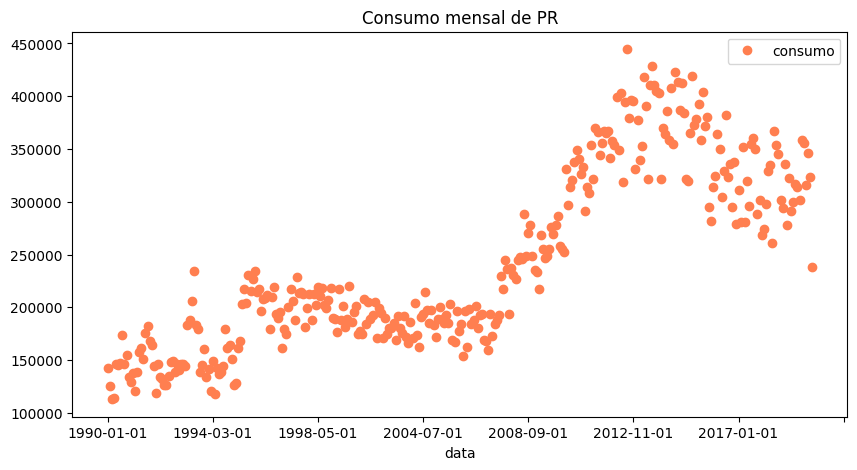

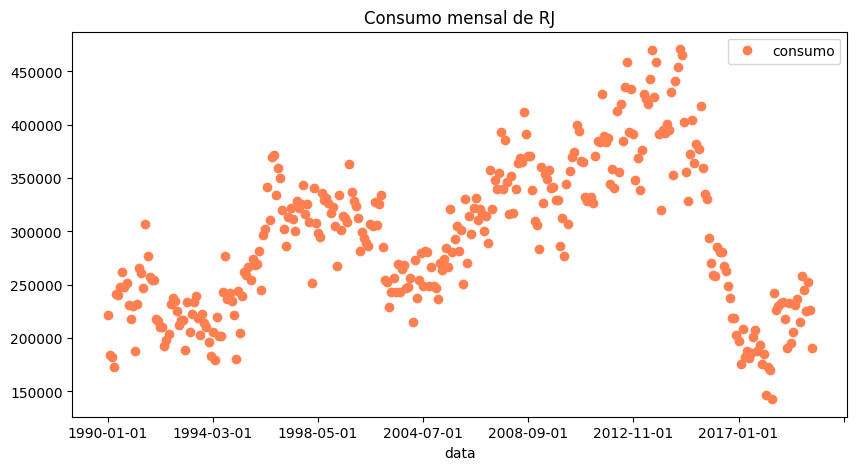

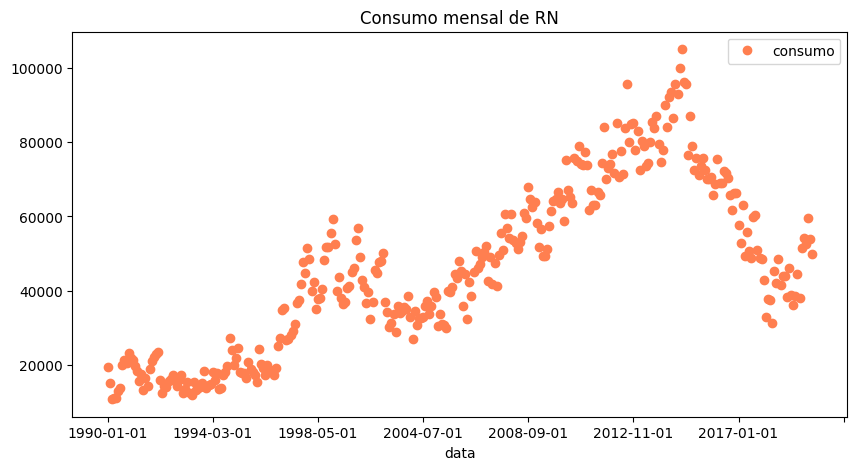

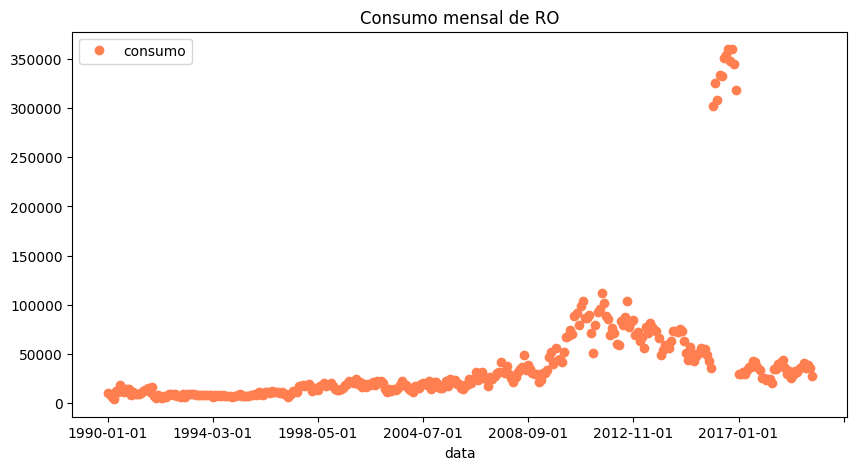

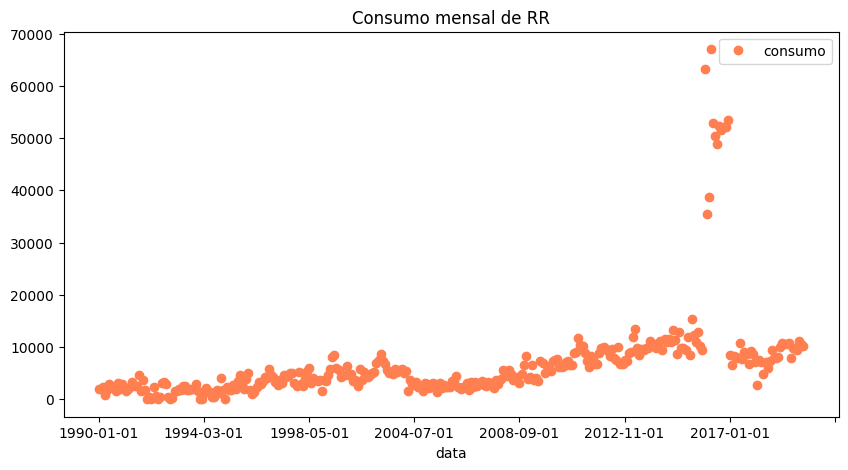

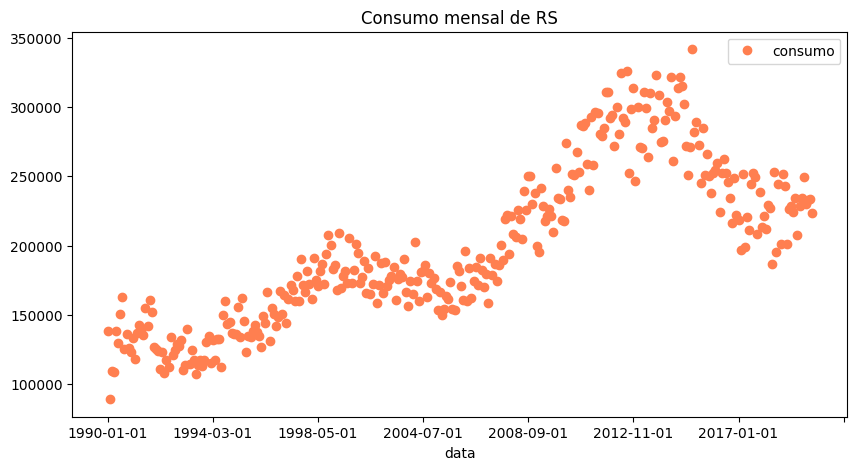

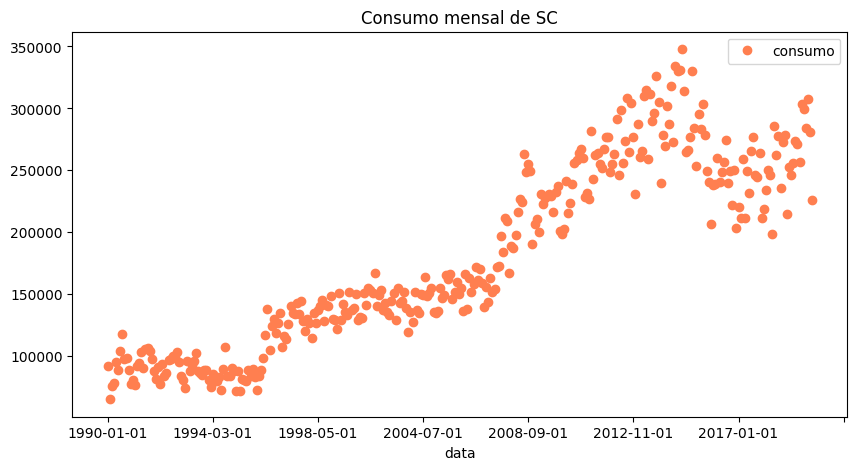

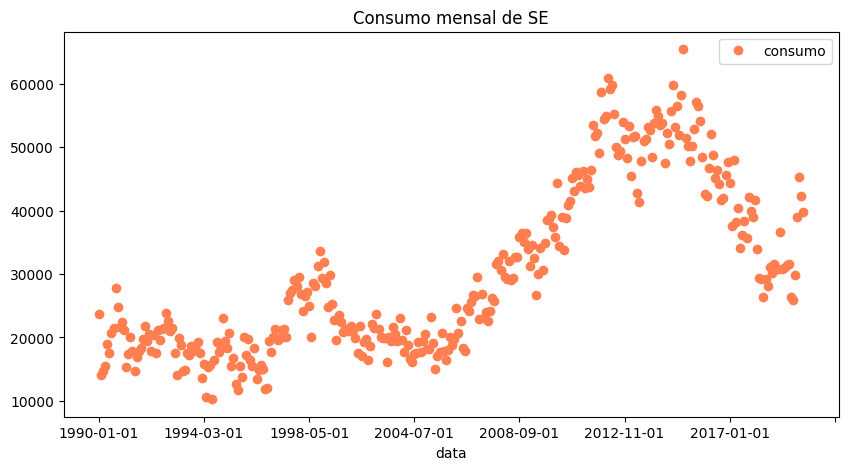

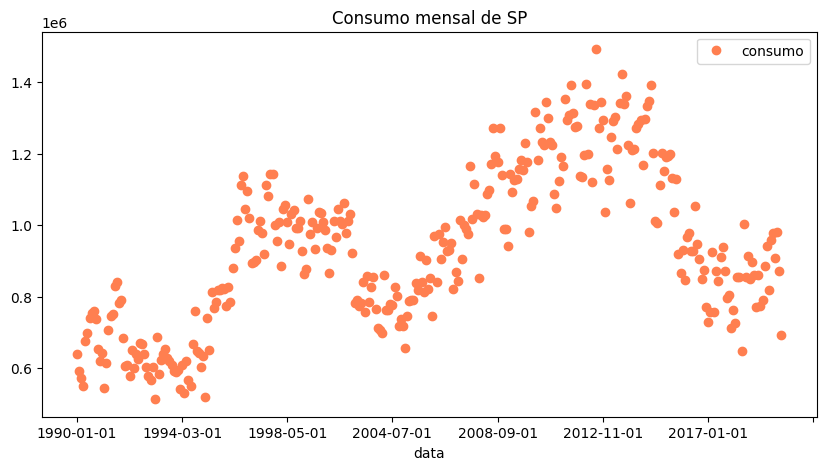

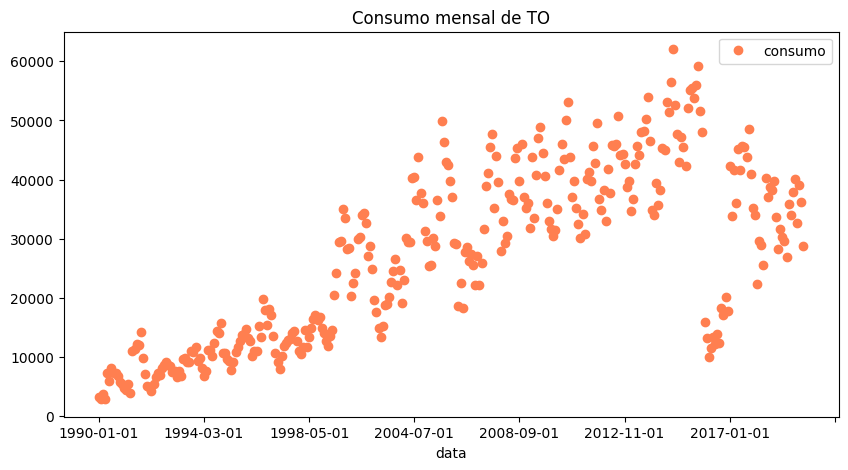

In [103]:
for state in range(27):
        
    df[df['estados'] == SIGLAS[state]].plot(figsize=(10,5), linestyle=" ", marker="o", color="coral", title=f"Consumo mensal de {SIGLAS[state]}")
    
    #aux = df[df['estados'] == SIGLAS[state]].copy()

    #plt.scatter(aux.index,aux['consumo'], color="coral")

In [5]:
df = pd.read_csv(f"{PATH}processado.csv")

In [6]:
df.head()

,estados,data,pib_pc,pib_pmc,pib_pcpt,pib_cc,populacao,incc,ipca,igp,...,idh_r,idh_e,nfsp,estoque,desemprego,producao,preco_ton,preco_saco,preco_kg,consumo
0,AC,2003-01-01,434223.352964,228569.188542,0.739806,506500.171013,586942.0,1.70,12.53,2.70,...,0.612,0.325,3.46,6.098524e+06,6.582788,-1.0,-1.0,-1.0,-1.0,3260.0
1,AC,2003-02-01,434223.352964,228569.188542,0.739806,506500.171013,586942.0,1.51,2.25,2.17,...,0.612,0.325,3.59,6.172460e+06,6.582788,-999.0,-1.0,-1.0,-1.0,2191.0
2,AC,2003-03-01,434223.352964,228569.188542,0.739806,506500.171013,586942.0,1.39,3.86,1.59,...,0.612,0.325,3.84,6.172460e+06,6.582788,-999.0,-1.0,-1.0,-1.0,2154.0
3,AC,2003-04-01,434223.352964,228569.188542,0.739806,506500.171013,586942.0,1.38,5.13,1.66,...,0.612,0.325,3.95,6.172460e+06,6.582788,34655.0,-1.0,-1.0,-1.0,2643.0
4,AC,2003-05-01,434223.352964,228569.188542,0.739806,506500.171013,586942.0,0.90,6.15,0.41,...,0.612,0.325,4.06,6.172460e+06,6.582788,172597.0,-1.0,-1.0,-1.0,2546.0


In [8]:
N='NORTE'
NE="NORDESTE"
CO='CENTRO OESTE'
SE='SUDESTE'
S = 'SUL'

REGIOES = {
    'AC': N, 'AL': NE, 'AM' : N, 'AP' : N, 'BA' : NE, 'CE' : NE,
    'DF' : CO, 'ES' : SE, 'GO' : CO, 'MA' : NE,
    'MG' : SE, 'MS' : CO, 'MT' : CO, 'PA' : N, 'PB' : NE,
    'PE' : NE, 'PI' : NE, 'PR' : S, 'RJ' : SE,
    'RN' : NE, 'RO' : N, 'RR' : N, 'RS' : S,
    'SC' : S, 'SE' : NE, 'SP' : SE, 'TO' : N}

def get_regiao (x):
    return REGIOES[x]

In [20]:
y = df[['estados', 'data', 'consumo']]
y['regiao'] = y['estados'].apply(get_regiao)

C:\Users\julia\AppData\Local\Temp\ipykernel_4088\2595254451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['regiao'] = y['estados'].apply(get_regiao)


In [21]:
y = y[y["data"] > "2017-01-01"]
y = y.set_index('data')

<AxesSubplot: xlabel='data', ylabel='consumo'>

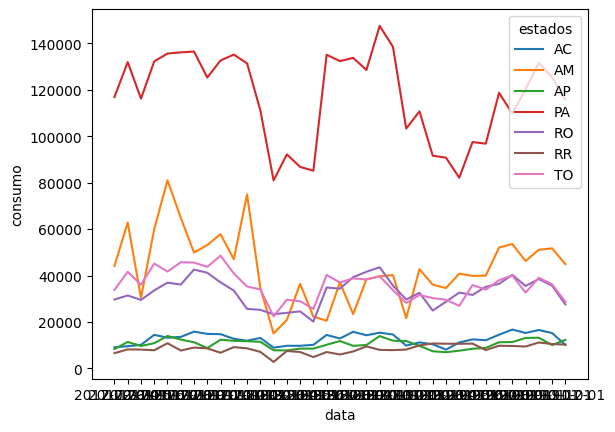

In [22]:
sns.lineplot(data=y[y['regiao'] == 'NORTE'], x=y[y['regiao'] == 'NORTE'].index, y='consumo', hue="estados")

<AxesSubplot: xlabel='data', ylabel='consumo'>

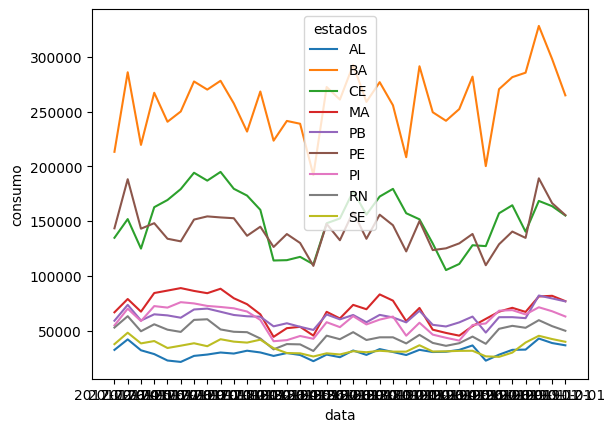

In [24]:
sns.lineplot(data=y[y['regiao'] == 'NORDESTE'], x=y[y['regiao'] == 'NORDESTE'].index, y='consumo', hue="estados")

<AxesSubplot: xlabel='data', ylabel='consumo'>

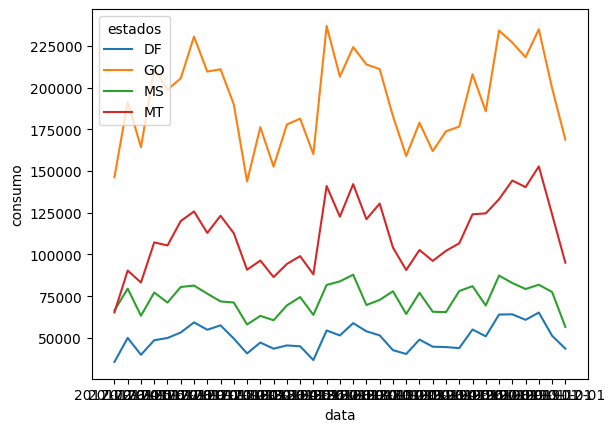

In [25]:
sns.lineplot(data=y[y['regiao'] == 'CENTRO OESTE'], x=y[y['regiao'] == 'CENTRO OESTE'].index, y='consumo', hue="estados")

<AxesSubplot: xlabel='data', ylabel='consumo'>

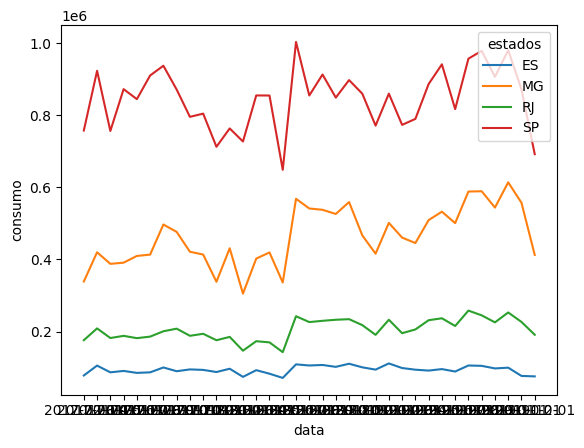

In [23]:
sns.lineplot(data=y[y['regiao'] == 'SUDESTE'], x=y[y['regiao'] == 'SUDESTE'].index, y='consumo', hue="estados")

<AxesSubplot: xlabel='data', ylabel='consumo'>

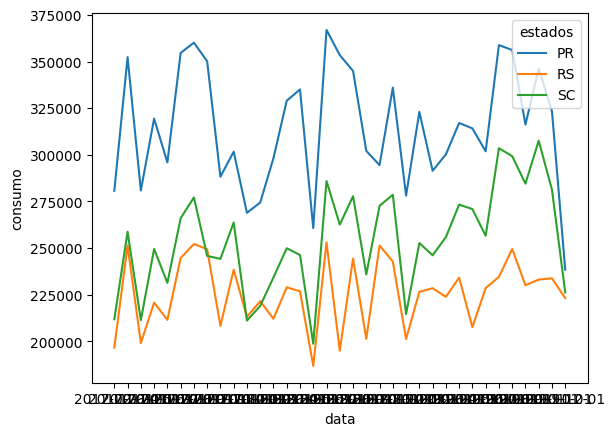

In [26]:
sns.lineplot(data=y[y['regiao'] == 'SUL'], x=y[y['regiao'] == 'SUL'].index, y='consumo', hue="estados")

In [29]:
df['consumo'].mean()

158496.20818572986

In [31]:
df[df['data'] > "2017-06-01"]['consumo'].mean()

147176.64197530865